<a href="https://colab.research.google.com/github/alyafira123/Tugas_14_Python/blob/main/Tugas_Python_14_Alya_Shafira_1101184200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import matplotlib.pyplot as plt

#Fungsi menghitung pathloss (cost231)
def cos(d,fc,tipe,ht,hr):

  #fc = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
  
    if fc in range(150,1501):
        C1=69.55
        C2=26.16
    elif fc in range(1501,2001):
        C1=46.3
        C2=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((fc/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(fc))+18.33*(np.log10(fc))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(fc)-0.7)*hr-(1.56*np.log10(fc)-1.8)
    Lp = C1+(C2*np.log10(fc))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp
  
  #Fungsi perhitungan daya terima
def prx(ptx,pl,gtx,grx):

  Pr = 10**(((10*(np.log10(ptx*1000))) - pl + gtx + grx)/10)

  return Pr

In [ ]:
#Fungsi perhitungan SNR
def snr(prx,bw):

  No = -174 + 10*(np.log10(bw))
  Sn = prx / (10**(No/10))

  return Sn

In [ ]:
#Fungsi perhitungan kapasitas seluler
def btr(snr,bw):

  Br = bw * np.log2(1+snr)

  return Br

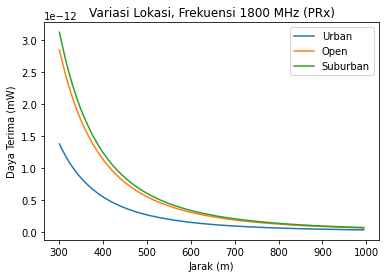

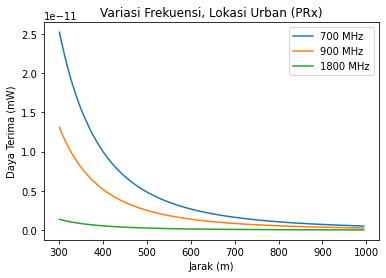

In [ ]:
#generate nilai jarak berdasarkan user
jarak=np.random.randint(300,1000,200) #(jarakawal,jarakakhir,jumlahuser)
jarak_sort=jarak[np.argsort(jarak)]

#GRAFIK DAYA TERIMA

#variasi medan daya terima
pathlossUrban=cos(jarak,1800,'urban',80,1.5) #(jarak(m),frekuensi(MHz),model,tinggiTx(m),tinggiRx(m))
Urban_sort=pathlossUrban[np.argsort(jarak)]
PrxUrban=prx(30,Urban_sort,10,2) #(dayaTx(watt),pathloss(dB),gainTx(dB),gainRx(dB))

pathlossSuburban=cos(jarak,1800,'suburban',80,1.5)
Suburban_sort=pathlossSuburban[np.argsort(jarak)]
PrxSuburban=prx(30,Suburban_sort,10,2)

pathlossOpen=cos(jarak,1800,'open',80,1.5)
Open_sort=pathlossOpen[np.argsort(jarak)]
PrxOpen=prx(30,Open_sort,10,2)

plt.figure()
plt.plot(jarak_sort,PrxUrban,label='Urban')
plt.plot(jarak_sort,PrxOpen,label='Open')
plt.plot(jarak_sort,PrxSuburban,label='Suburban')
plt.legend()
plt.title('Variasi Lokasi, Frekuensi 1800 MHz (PRx)')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (mW)')
plt.show()

#variasi frekuensi daya terinma
pathloss700=cos(jarak,700,'urban',80,1.5)
f700_sort=pathloss700[np.argsort(jarak)]
Prx700=prx(30,f700_sort,10,2)

pathloss900=cos(jarak,900,'urban',80,1.5)
f900_sort=pathloss900[np.argsort(jarak)]
Prx900=prx(30,f900_sort,10,2)

pathloss1800=cos(jarak,1800,'urban',80,1.5)
f1800_sort=pathloss1800[np.argsort(jarak)]
Prx1800=prx(30,f1800_sort,10,2)

plt.figure()
plt.plot(jarak_sort,Prx700,label='700 MHz')
plt.plot(jarak_sort,Prx900,label='900 MHz')
plt.plot(jarak_sort,Prx1800,label='1800 MHz')

plt.legend()
plt.title('Variasi Frekuensi, Lokasi Urban (PRx)')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (mW)')
plt.show()

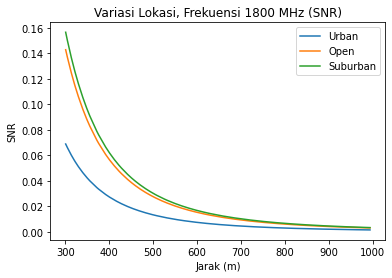

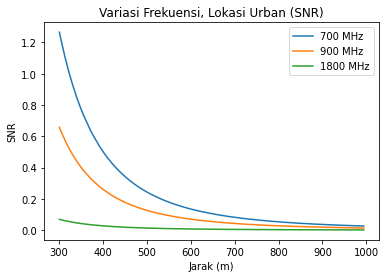

In [ ]:
#GRAFIK SNR

#variasi medan snr
SnrUrban=snr(PrxUrban,5000000) #(dayaterima(numerik),bandwidth(Hz))
SnrOpen=snr(PrxOpen,5000000)
SnrSuburban=snr(PrxSuburban,5000000)

plt.figure()
plt.plot(jarak_sort,SnrUrban,label='Urban')
plt.plot(jarak_sort,SnrOpen,label='Open')
plt.plot(jarak_sort,SnrSuburban,label='Suburban')
plt.legend()
plt.title('Variasi Lokasi, Frekuensi 1800 MHz (SNR)')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR')
plt.show()

#variasi frekuensi snr
Snr700=snr(Prx700,5000000)
Snr900=snr(Prx900,5000000)
Snr1800=snr(Prx1800,5000000)

plt.figure()
plt.plot(jarak_sort,Snr700,label='700 MHz')
plt.plot(jarak_sort,Snr900,label='900 MHz')
plt.plot(jarak_sort,Snr1800,label='1800 MHz')
plt.legend()
plt.title('Variasi Frekuensi, Lokasi Urban (SNR)')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR')
plt.show()

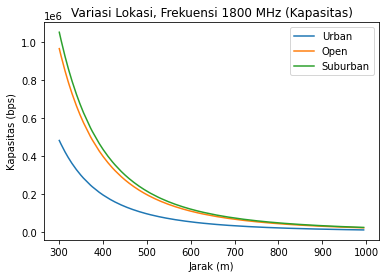

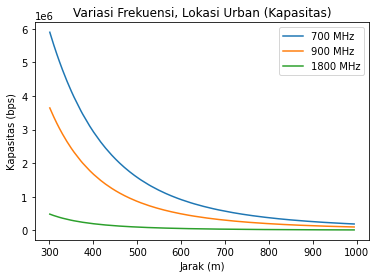

In [ ]:
#GRAFIK KAPASITAS

#variasi medan kapasitas
BtrUrban=btr(SnrUrban,5000000) #(snr(numerik),bandwidth(Hz))
BtrOpen=btr(SnrOpen,5000000)
BtrSuburban=btr(SnrSuburban,5000000)

plt.figure()
plt.plot(jarak_sort,BtrUrban,label='Urban')
plt.plot(jarak_sort,BtrOpen,label='Open')
plt.plot(jarak_sort,BtrSuburban,label='Suburban')
plt.legend()
plt.title('Variasi Lokasi, Frekuensi 1800 MHz (Kapasitas)')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()

#variasi frekuensi kapasitas
Btr700=btr(Snr700,5000000)
Btr900=btr(Snr900,5000000)
Btr1800=btr(Snr1800,5000000)

plt.figure()
plt.plot(jarak_sort,Btr700,label='700 MHz')
plt.plot(jarak_sort,Btr900,label='900 MHz')
plt.plot(jarak_sort,Btr1800,label='1800 MHz')
plt.legend()
plt.title('Variasi Frekuensi, Lokasi Urban (Kapasitas)')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()